# MSA 2025 Phase 2 - Part 1

In [50]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [51]:
# Load dataset and display first 10 rows

# Load the dataset from the datasets folder
file_path = "store_sales.csv"

# Try reading with ISO-8859-1
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first 10 rows
df.head(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [52]:
df.shape
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [53]:
# Safely drop Row ID
df = df.drop(columns=["Row ID"])

# Display the statistics
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,55726.556341,349.834887,3.785007,0.173923,8.699327
std,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,90032.000000,435.168000,5.000000,0.300000,33.726600
max,99301.000000,4416.174000,14.000000,0.700000,1013.127000


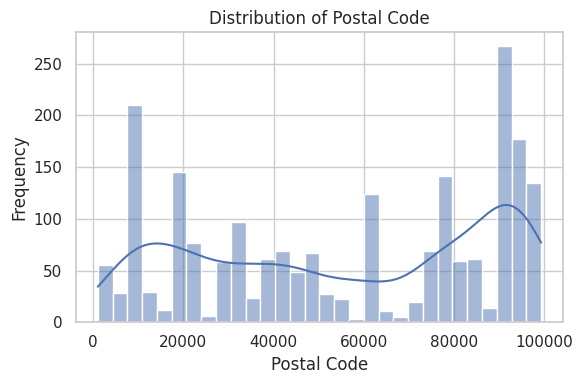

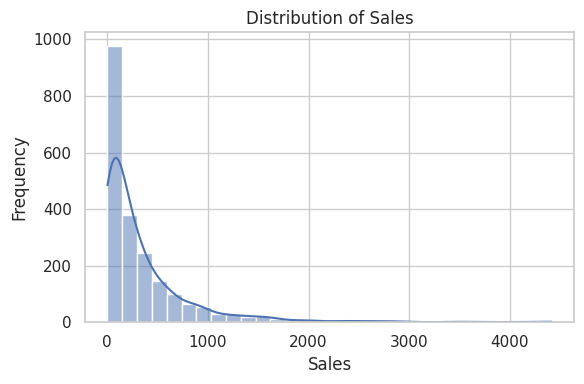

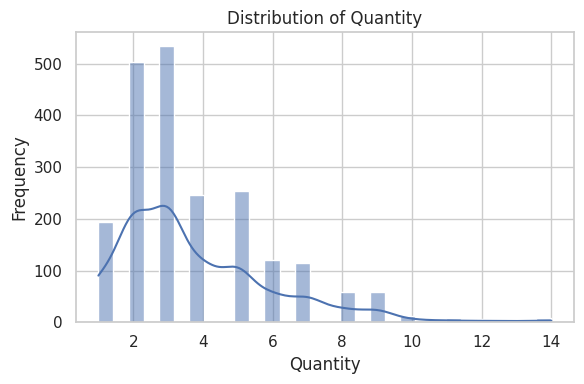

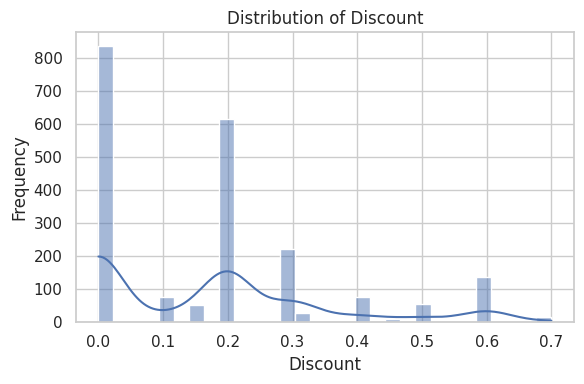

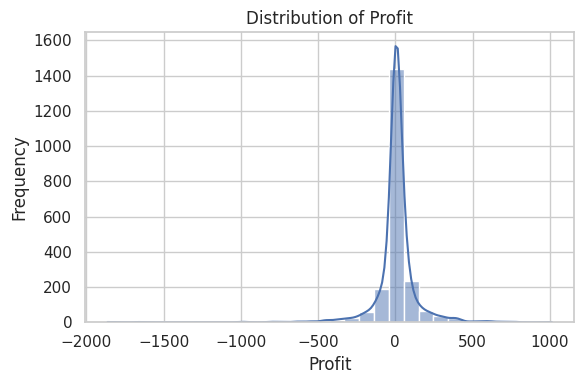

In [54]:
# Visualise numerical columns with histograms, boxplots, and barplots

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set plot style
sns.set(style="whitegrid")

# Histograms for distribution
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


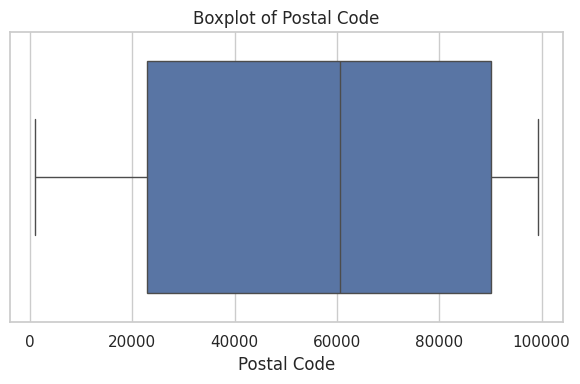

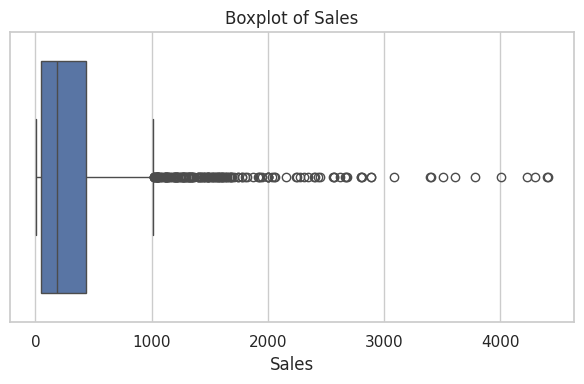

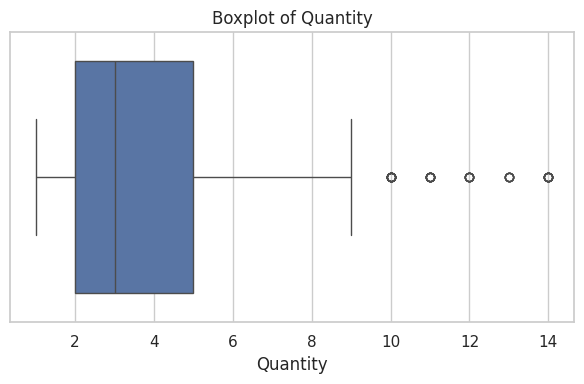

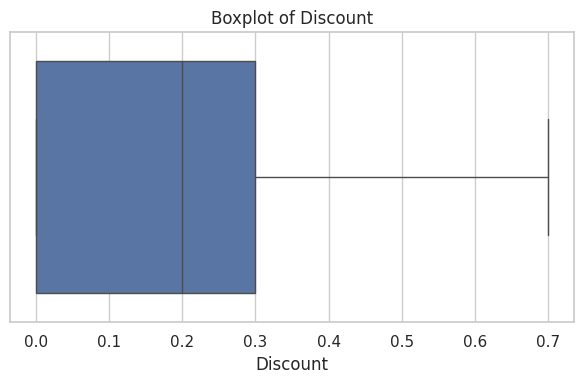

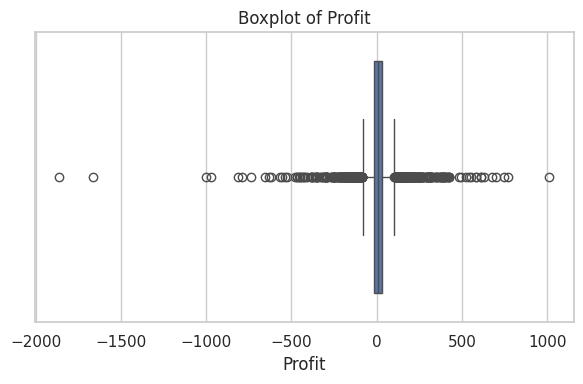

In [55]:
# Boxplots to detect outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

,Empty Cells
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0
State,0


/tmp/ipython-input-56-84274630.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data.sort_values(by='Empty Cells', ascending=False, inplace=True)


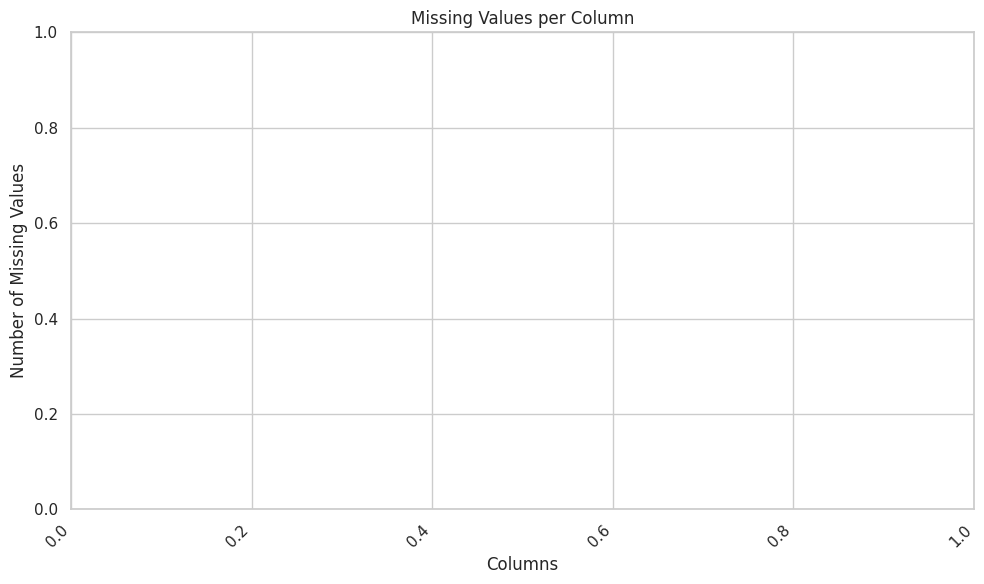

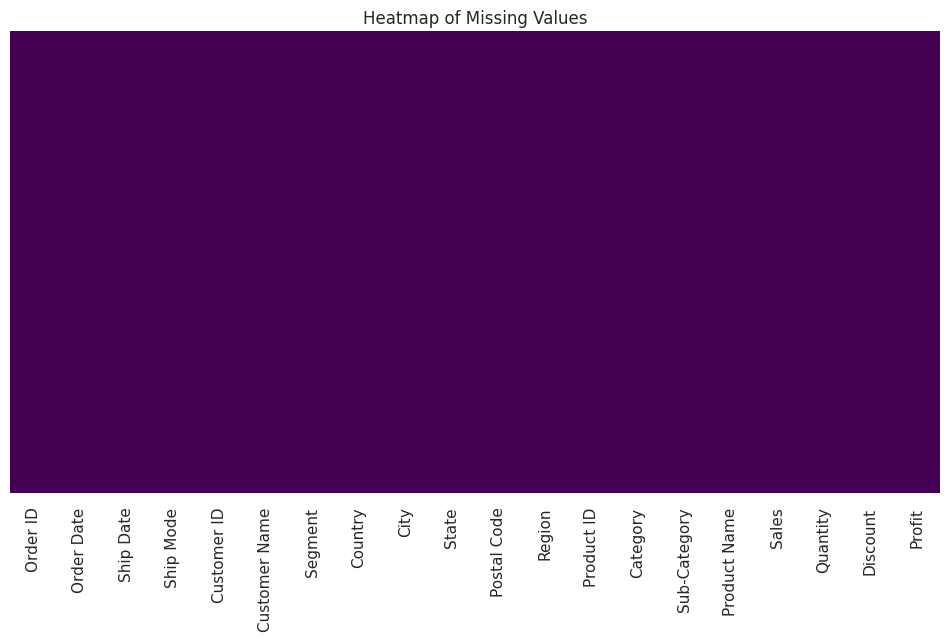

In [56]:
# 检查每列缺失值数量
missing_data = df.isnull().sum().to_frame(name='Empty Cells')
display(missing_data)

# 可视化缺失值：条形图
plt.figure(figsize=(10, 6))
missing_data = missing_data[missing_data['Empty Cells'] > 0]
missing_data.sort_values(by='Empty Cells', ascending=False, inplace=True)
sns.barplot(x=missing_data.index, y='Empty Cells', data=missing_data)
plt.xticks(rotation=45, ha='right')
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

# 可视化缺失值：热图（缺失为True，非缺失为False）
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()


In [57]:
# Convert non-numeric columns to numeric (with exclusions)

from sklearn.preprocessing import LabelEncoder

# Step 1: Define columns that should NOT be encoded
exclude_cols = [
    'Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Category','Country',
    'Customer Name', 'Product Name', 'Order Date', 'Ship Date', 'Postal Code'
]

# Step 2: Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Step 3: Filter non-numeric columns for those that should be encoded
encode_candidates = [col for col in non_numeric_cols if col not in exclude_cols]

# Step 4: Separate those suitable for Label Encoding (low cardinality)
label_encodable = [col for col in encode_candidates if df[col].nunique() <= 10]

# Step 5: Apply Label Encoding to binary or low-cardinality categorical columns
le = LabelEncoder()
for col in label_encodable:
    df[col] = le.fit_transform(df[col])

# Step 6: One-hot encode high-cardinality columns (excluding already label-encoded)
high_cardinality = [col for col in encode_candidates if col not in label_encodable]
df_converted = pd.get_dummies(df, columns=high_cardinality, drop_first=True)

# Step 7: Check final result
print("\nRemaining non-numeric columns:", df_converted.select_dtypes(include=['object']).columns.tolist())
print("Final dataset shape:", df.shape)
df_converted.dtypes.head(10)



Remaining non-numeric columns: ['Order ID', 'Order Date', 'Ship Date', 'Customer ID', 'Customer Name', 'Country', 'Product ID', 'Category', 'Product Name']
Final dataset shape: (2121, 20)


,0
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,int64
Customer ID,object
Customer Name,object
Segment,int64
Country,object
Postal Code,int64
Region,int64


## 2. Visualise data

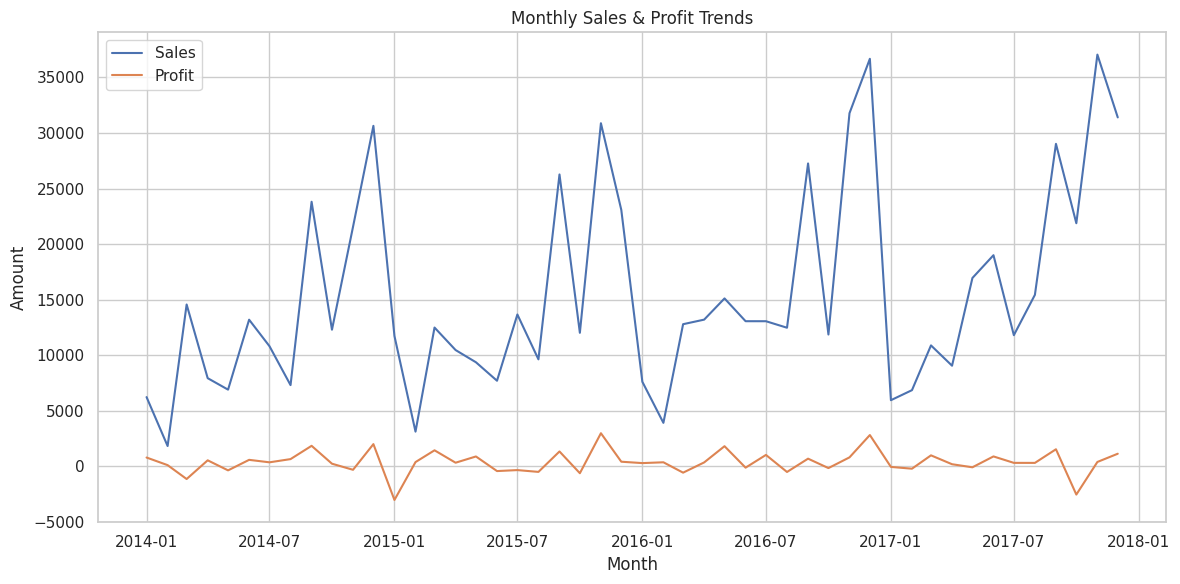

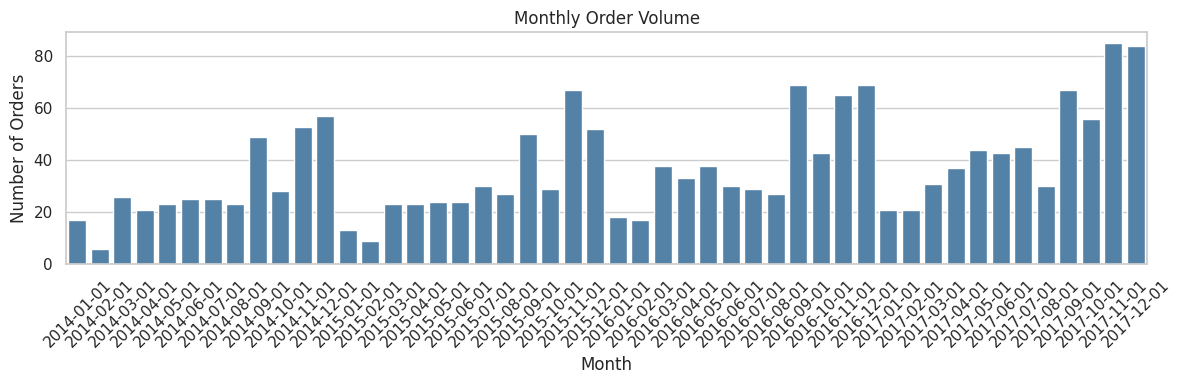

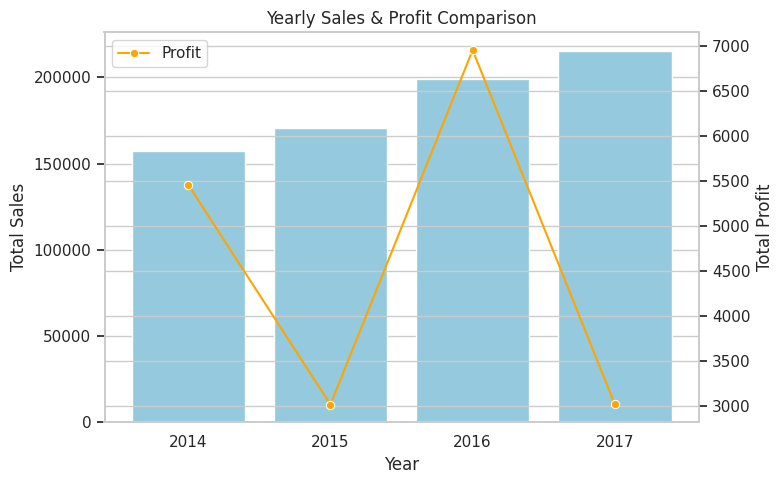

In [58]:
dfv=df.copy()
# ------------------------------------------------------------------------
# 1. Strip spaces from column names (prevent key error)
dfv.columns = dfv.columns.str.strip()

# ------------------------------------------------------------------------
# 2. Convert 'Order Date' to datetime using correct format: MM/DD/YYYY
dfv['Order Date'] = pd.to_datetime(dfv['Order Date'], format='%m/%d/%Y', errors='coerce')

# ------------------------------------------------------------------------
# 3. Extract Year and Month
dfv['Year'] = dfv['Order Date'].dt.year
dfv['Month'] = dfv['Order Date'].dt.to_period('M')

# ------------------------------------------------------------------------
# 4a. Monthly Aggregation
monthly_agg = (
    dfv.groupby('Month')
      .agg(Total_Sales=('Sales', 'sum'),
           Total_Profit=('Profit', 'sum'),
           Order_Count=('Order ID', 'nunique'))
      .reset_index()
)
monthly_agg['Month'] = monthly_agg['Month'].dt.to_timestamp()  # for plotting

# ------------------------------------------------------------------------
# 4b. Yearly Aggregation
yearly_agg = (
    dfv.groupby('Year')
      .agg(Total_Sales=('Sales', 'sum'),
           Total_Profit=('Profit', 'sum'),
           Order_Count=('Order ID', 'nunique'))
      .reset_index()
)

# ------------------------------------------------------------------------
# 5a. Monthly Trends: Sales & Profit
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_agg, x='Month', y='Total_Sales', label='Sales')
sns.lineplot(data=monthly_agg, x='Month', y='Total_Profit', label='Profit')
plt.title('Monthly Sales & Profit Trends')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 5b. Monthly Order Volume
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_agg, x='Month', y='Order_Count', color='steelblue')
plt.title('Monthly Order Volume')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------------
# 5c. Yearly Summary: Sales & Profit (Fixed)
fig, ax1 = plt.subplots(figsize=(8, 5))

# Convert year to string to ensure alignment of bar and line x-axis
yearly_agg['Year'] = yearly_agg['Year'].astype(str)

# Barplot for sales
sns.barplot(data=yearly_agg, x='Year', y='Total_Sales', ax=ax1, color='skyblue')
ax1.set_ylabel('Total Sales')
ax1.set_title('Yearly Sales & Profit Comparison')
ax1.set_xlabel('Year')

# Lineplot for profit (secondary y-axis)
ax2 = ax1.twinx()
sns.lineplot(data=yearly_agg, x='Year', y='Total_Profit', ax=ax2,
             marker='o', color='orange', label='Profit')
ax2.set_ylabel('Total Profit')

# Add legend manually to ax2
ax2.legend(loc='upper left')

fig.tight_layout()
plt.show()



## 2. Clean data

In [59]:
def handle_missing_values(df: pd.DataFrame,
                          drop_col_thresh: float = 0) -> pd.DataFrame:
    """
    Handle missing values in a DataFrame.
    1. Drop columns with missing-rate > drop_col_thresh.
    2. For numeric columns: impute using median.
    3. For categorical columns: impute using mode.
    """
    # 1) Drop columns with excessive missing rate
    missing_rate = df.isna().mean()
    cols_to_drop = missing_rate[missing_rate > drop_col_thresh].index.tolist()
    df = df.drop(columns=cols_to_drop)

    # 2) Numeric median imputation
    num_cols = df.select_dtypes(include=['number']).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    # 3) Categorical mode imputation
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df


In [60]:
from sklearn.preprocessing import StandardScaler

def cap_outliers_iqr(series: pd.Series, factor: float = 1.5) -> pd.Series:
    """
    Winsorize a numeric Series using the IQR method.
    Values outside [Q1 - factor*IQR, Q3 + factor*IQR] are capped.
    """
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - factor*iqr, q3 + factor*iqr
    return series.clip(lower, upper)

def treat_outliers_and_scale(df: pd.DataFrame) -> pd.DataFrame:
    """
    1. Cap outliers of numeric columns via IQR method.
    2. Apply StandardScaler so features have zero mean & unit variance.
    """
    num_cols = df.select_dtypes(include='number').columns

    # 1) Cap outliers
    for col in num_cols:
        df[col] = cap_outliers_iqr(df[col])

    # 2) Standardize features
    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    return df


In [61]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def balance_classes(X: pd.DataFrame, y: pd.Series,
                    strategy: str = 'auto',
                    sampling: str = 'smote'):
    """
    Return resampled (X_res, y_res).
    sampling: 'smote' | 'undersample'
    """
    if sampling == 'smote':
        sampler = SMOTE(sampling_strategy=strategy, random_state=42)
    elif sampling == 'undersample':
        sampler = RandomUnderSampler(sampling_strategy=strategy, random_state=42)
    else:
        raise ValueError("sampling must be 'smote' or 'undersample'")

    X_res, y_res = sampler.fit_resample(X, y)
    return X_res, y_res


In [62]:
# from sklearn.feature_selection import SelectKBest, mutual_info_classif, mutual_info_regression

# def select_top_k(X: pd.DataFrame, y,
#                  task: str = 'classification',
#                  k: int = 20) -> pd.DataFrame:
#     """
#     Select top-k informative features via mutual information.
#     task: 'classification' or 'regression'
#     """
#     if task == 'classification':
#         selector = SelectKBest(mutual_info_classif, k=min(k, X.shape[1]))
#     else:
#         selector = SelectKBest(mutual_info_regression, k=min(k, X.shape[1]))

#     X_new = selector.fit_transform(X, y)
#     selected_cols = X.columns[selector.get_support()]
#     return pd.DataFrame(X_new, columns=selected_cols)


In [63]:
# ---- Dataset preparation pipeline (Period-safe) ----
df_clean  = handle_missing_values(df_converted.copy())
df_scaled = treat_outliers_and_scale(df_clean)

y = df_scaled['Profit']
X = df_scaled.drop(columns=exclude_cols + ['Profit'])

# Feature selection
X_selected = select_top_k(X, y, task='regression', k=25)

print("Final row count:", X_selected.shape[0])      # shape[0]
print("Final column count:", X_selected.shape[1])   # shape[1]


KeyError: "['Row ID'] not found in axis"

## 4. Identify correlated variables

In [ ]:
# -------------------- 1. Compute Correlation Matrix --------------------
# Use all numeric columns except identifiers / dates
corr_df = df_scaled.drop(columns=exclude_cols)

# Full Pearson correlation matrix
corr_matrix = corr_df.corr(method='pearson')

# -------------------- 2. Visualise as Heatmap --------------------
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # show upper-triangle only
sns.heatmap(corr_matrix,
            mask=mask,
            cmap='coolwarm',
            center=0,
            linewidths=.5,
            annot=False)
plt.title('Pearson Correlation Matrix (Numerical Features)')
plt.show()

# -------------------- 3. Correlation w.r.t. Target (Profit) --------------------
target_corr = corr_df.corr()['Profit'].abs().sort_values(ascending=False)
print("Top 10 features most correlated with Profit:")
display(target_corr.head(10))

# -------------------- 4. Detect Highly Collinear Feature Pairs --------------------
# Any pair |corr| > threshold will be flagged
threshold = 0.80
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = [(col, row, upper_tri.loc[row, col])
                   for col in upper_tri.columns
                   for row in upper_tri.index
                   if abs(upper_tri.loc[row, col]) > threshold]

print(f"\nHighly correlated pairs (|corr| > {threshold}):")
for row, col, val in high_corr_pairs:
    print(f"{row:25s} ↔ {col:25s}  corr = {val:.2f}")

# -------------------- 5. Drop One Feature from Each Highly Correlated Pair --------------------
to_drop = set()
for row, col, _ in high_corr_pairs:
    # keep the feature that has higher absolute correlation with Profit
    if abs(corr_df[row].corr(y)) >= abs(corr_df[col].corr(y)):
        to_drop.add(col)
    else:
        to_drop.add(row)

print("\nFeatures suggested to drop (due to multicollinearity):", to_drop)

# Optional: create a reduced feature set without those columns
X_reduced = corr_df.drop(columns=to_drop)
print("Shape after dropping:", X_reduced.shape)


In [ ]:

# 1) Build a purely numeric DataFrame
num_df = (df_converted
          .drop(columns=exclude_cols, errors='ignore')  # drop if present
          .select_dtypes(include=[np.number])            # keep numeric dtypes
          .copy())

print("Numeric feature count:", num_df.shape[1])  # quick sanity-check

# 1) Compute Pearson correlation matrix for numeric columns only
corr_matrix = num_df.corr(method='pearson')

# 2) Visualise with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            center=0,
            vmax=1.0,
            vmin=-1.0,
            annot=False,
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation Matrix (Pearson)')
plt.tight_layout()
plt.show()

# 3) Identify highly correlated feature pairs (|r| > 0.8) *excluding self-correlation*
threshold = 0.8
# Stack the matrix, drop |r|=1 diagonal, reset index for readability
corr_pairs = (corr_matrix
              .abs()
              .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
              .stack()
              .reset_index())
corr_pairs.columns = ['Feature_1', 'Feature_2', 'AbsCorr']

high_corr = corr_pairs[corr_pairs['AbsCorr'] >= threshold]
display(high_corr.sort_values('AbsCorr', ascending=False))

# 4) Decide which features to drop (keep only one from each highly-correlated pair)
#    Here we keep the first column and drop the second; adjust logic as needed.
drops = high_corr['Feature_2'].unique().tolist()
print("Dropping redundant features:", drops)

df_pruned = df_converted.drop(columns=drops)
print("New shape after pruning:", df_pruned.shape)


## 5. Summary